visualizations

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


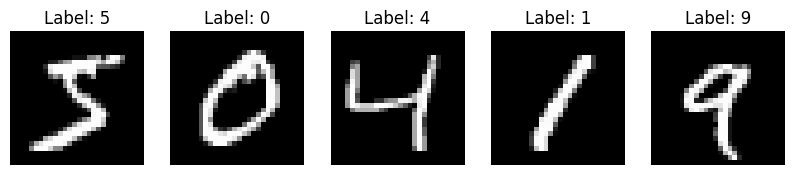

Epoch 0, Loss: 0.2285826018237429


<ipython-input-5-224e8cd1c00f>:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 10, Loss: 0.1
Epoch 20, Loss: 0.1
Epoch 30, Loss: 0.1
Epoch 40, Loss: 0.1
Epoch 50, Loss: 0.1
Epoch 60, Loss: 0.1
Epoch 70, Loss: 0.1
Epoch 80, Loss: 0.1
Epoch 90, Loss: 0.1


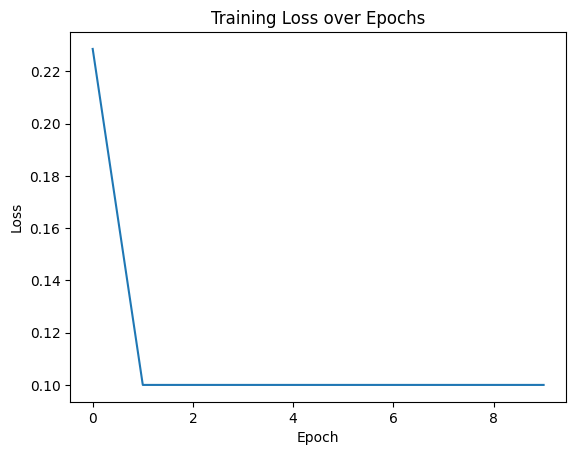

Test Accuracy: 8.50%


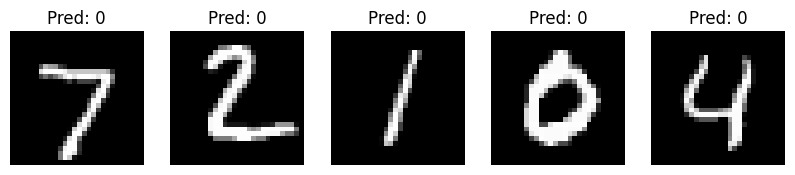

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset using TensorFlow (it automatically downloads it)
def load_mnist():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

    # Normalize the images to [0, 1]
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Flatten the images (28x28 -> 784)
    train_images = train_images.reshape(train_images.shape[0], 784)
    test_images = test_images.reshape(test_images.shape[0], 784)

    # One-hot encode the labels
    train_labels_onehot = np.eye(10)[train_labels]
    test_labels_onehot = np.eye(10)[test_labels]

    return train_images, train_labels_onehot, test_images, test_labels_onehot

# Sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        #self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        #self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        self.bias_output = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.losses = []  # To track loss over epochs

    def forward(self, X):
        self.z1 = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        output_error = output - y
        output_delta = output_error * sigmoid_derivative(self.z2)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.z1)

        self.weights_hidden_output -= self.learning_rate * np.dot(self.a1.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 10 == 0:
                loss = np.mean((y - output) ** 2)
                self.losses.append(loss)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Load MNIST dataset
train_images, train_labels_onehot, test_images, test_labels_onehot = load_mnist()

# Initialize the neural network
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.1)

# Visualize a few sample images from the training set
def visualize_samples():
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {np.argmax(train_labels_onehot[i])}")
        plt.axis('off')
    plt.show()

# Train the network and visualize the loss
def train_and_visualize():
    visualize_samples()  # Display sample images from the training set
    nn.train(train_images[:5000], train_labels_onehot[:5000], epochs=100)

    # Plot the loss over epochs
    plt.plot(nn.losses)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Test the network
    predictions = nn.predict(test_images[:1000])
    accuracy = np.mean(predictions == np.argmax(test_labels_onehot[:1000], axis=1))
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Visualize the model's predictions on test images
    visualize_predictions(predictions)

# Visualize the model's predictions
def visualize_predictions(predictions):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Run training and visualizations
train_and_visualize()


28 x 28 low rs handwritten digits

each pixel (total 786 pixels) have each 0 to 255 values assigned to show whether its black or white

neural network:
0. input layer 784 nodes
1. hidden layer 10 nodes
2. output layr 10 nodes

forward propagation
- A_0 = x
- z_1 = w_1 dot A_0 + b_1
- A_1 = g(Z_1) = ReLu(Z_1)

rectified linear unit
| x if x > 0  |
| 0 if x <= 0 |

Softmax activation function


Back propagation
- dz_2 = A_2 - Y
- dw_2 = 1/m dz_2 A_1T

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

#unpack tuples
(train_images, train_label), (test_images, test_label) = tf.keras.datasets.mnist.load_data()

#normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

#flatten the images to 784 pixels
train_images = train_images.reshape(train_images.shape[0], 784) #60000, 784
test_images = test_images.reshape(test_images.shape[0], 784) # 10000, 784

train_images = train_images.T
test_images = test_images.T

m, n = 70000, 784

print(train_images.shape) #784, 60000
print(train_label.shape)  #60000,
print(test_images.shape)  #784, 10000
print(test_label.shape)   #10000,

print(test_label)

(784, 60000)
(60000,)
(784, 10000)
(10000,)
[7 2 1 ... 4 5 6]


In [7]:
def init_params():
  weight1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  weight2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return weight1, b1, weight2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(weight1, b1, weight2, b2, X):
  z1 = weight1.dot(X) + b1
  A1 = ReLU(z1)
  z2 = weight2.dot(A1) + b2
  A2 = softmax(z2)
  return z1, A1, z2, A2

def ReLU_deriv(Z):
  return Z > 0

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  print(one_hot_Y.shape)
  return one_hot_Y

def backward_prop(z1, A1, z2, A2, weight1, weight2, X, Y):
  one_hot_Y = one_hot(Y)
  dz2 = A2 - one_hot_Y
  dw2 = 1 / m * dz2.dot(A1.T)
  db2 = 1 / m * np.sum(dz2)
  dz1 = weight2.T.dot(dz2) * ReLU_deriv(z1)
  dw1 = 1 / m * dz1.dot(X.T)
  db1 = 1 / m * np.sum(dz1)
  return dw1, db1, dw2, db2

def update_params(weight1, b1, weight2, b2, dw1, db1, dw2, db2, alpha):
  weight1 = weight1 - alpha * dw1
  b1 = b1 - alpha * db1
  weight2 = weight2 - alpha * dw2
  b2 = b2 - alpha * db2
  return weight1, b1, weight2, b2


In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(train_images, train_label, 0.10, 10)

(10, 60000)
Iteration:  0
[5 4 5 ... 9 9 5] [5 0 4 ... 5 6 8]
0.08525
(10, 60000)
(10, 60000)
(10, 60000)
(10, 60000)
(10, 60000)
(10, 60000)
(10, 60000)
(10, 60000)
(10, 60000)


In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = train_images[:, index, None]
    prediction = make_predictions(train_images[:, index, None], W1, b1, W2, b2)
    label = train_label[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  5


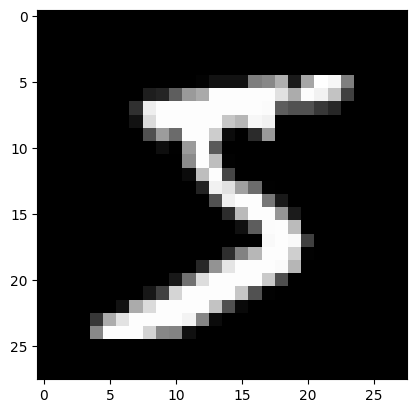

Prediction:  [3]
Label:  0


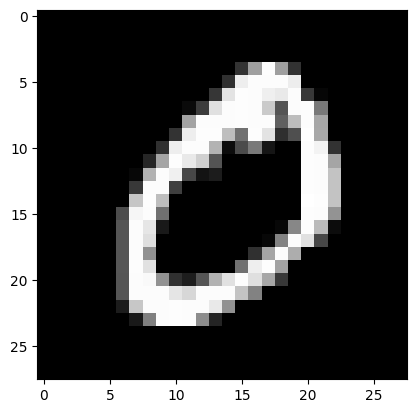

Prediction:  [5]
Label:  4


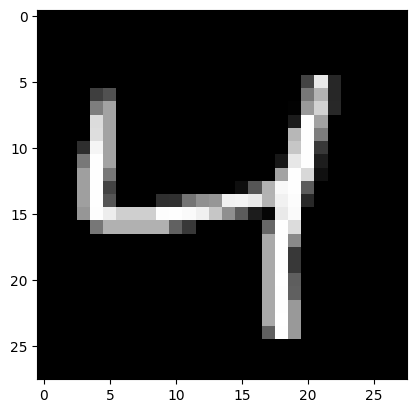

Prediction:  [3]
Label:  1


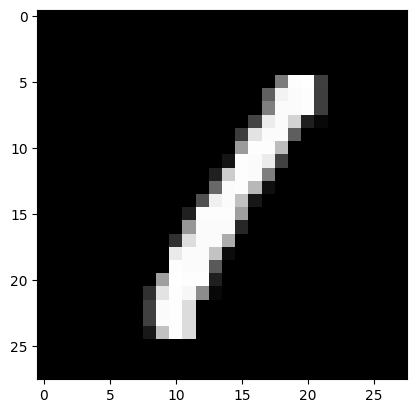

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(test_images, W1, b1, W2, b2)
get_accuracy(dev_predictions, test_label)

[3 4 4 ... 4 7 4] [7 2 1 ... 4 5 6]


0.187